# EDA

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_parquet("../data/data1.parquet")
df.head()

,price_open,price_high,price_low,price_close,volume_traded,trades_count,EMA10,EMA30,EMA200,RSI14,RSI30,RSI200,MOM10,MOM30,PROC9,MACD,K10,K30,K200
0,0.830490,0.830163,0.832869,0.830656,6.044853e-09,0.004569,0.833500,0.835151,0.843844,0.579469,0.523054,0.083122,0.944146,0.942472,0.001554,0.948436,0.578295,0.797727,0.564232
1,0.830656,0.829834,0.831427,0.829276,1.291042e-08,0.005970,0.833354,0.835155,0.843832,0.498361,0.492557,0.082204,0.940350,0.934008,0.001552,0.947938,0.439311,0.745271,0.555942
2,0.829275,0.828523,0.830918,0.828544,1.851503e-09,0.005757,0.833101,0.835111,0.843813,0.461432,0.477271,0.081718,0.939891,0.934821,0.001550,0.947228,0.248227,0.617899,0.514273
3,0.828544,0.828874,0.830819,0.829693,1.434924e-08,0.004782,0.833104,0.835145,0.843805,0.520938,0.501812,0.084829,0.941012,0.935356,0.001553,0.947103,0.167593,0.554991,0.493650
4,0.829692,0.830163,0.831862,0.830985,1.479025e-08,0.005666,0.833342,0.835260,0.843811,0.577496,0.527621,0.088321,0.942996,0.938374,0.001555,0.947496,0.424838,0.659218,0.530257


# Split

In [2]:
X = df.drop(columns=["price_close"])
y = df["price_close"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=False   # IMPORTANT for time-series
)

In [4]:
len(y_train)

137608

# Analysis

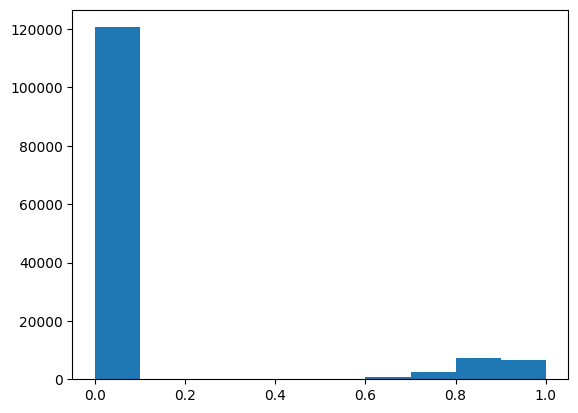

In [5]:
import matplotlib.pyplot as plt

plt.hist(y_train)
plt.show()

In [10]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import MinMaxScaler
import pyarrow

df = pd.read_csv("../data/kraken_15min_6mo_ohlcv.csv")

mapping = {
    "KRAKEN_SPOT_BTC_USD": "BTC",
    "KRAKEN_SPOT_ETH_USD": "ETH",
    "KRAKEN_SPOT_SOL_USD": "SOL",
    "KRAKEN_SPOT_XRP_USD": "XRP",
    "KRAKEN_SPOT_ADA_USD": "ADA",
    "KRAKEN_SPOT_DOGE_USD": "DOGE",
    "KRAKEN_SPOT_LTC_USD": "LTC",
    "KRAKEN_SPOT_AVAX_USD": "AVAX",
    "KRAKEN_SPOT_LINK_USD": "LINK",
    "KRAKEN_SPOT_DOT_USD": "DOT",
}

df["symbol_id"] = df["symbol_id"].replace(mapping)   # or .map(mapping) if exhaustive
 
df_raw = df.drop(columns=["symbol_id", 
                    "time_period_start", 
                    "time_period_end",
                    "time_open",
                    "time_close"
                    ])

df_raw.columns

Index(['price_open', 'price_high', 'price_low', 'price_close', 'volume_traded',
       'trades_count'],
      dtype='object')

In [7]:
y = df_raw["price_close"]

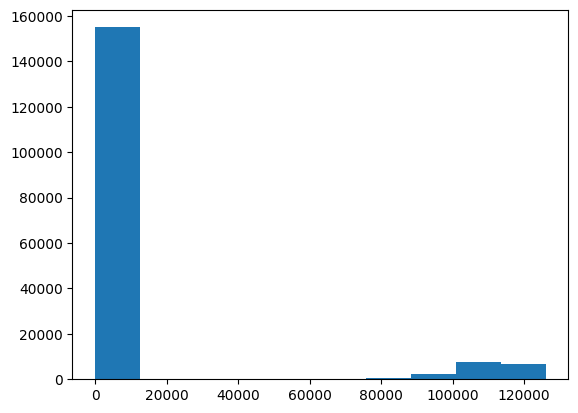

In [9]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.show()